# Minería de Texto

In [1]:
# Instalar libreria para los Wordcloud 
!pip install wordcloud

In [2]:
# Librerias para ciencia de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

# Vectorización de texto
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Regular expression operations
import re

# Librerias para procesamiento de lenguaje natural
from nltk.corpus import stopwords
import nltk

# Visualización de texto
from wordcloud import WordCloud

# Modelos de aprendizaje
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

# Gráficar árbol 
from sklearn.tree import plot_tree 

# Descargar stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hfelizzola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Analitica de Datos UJaveriana')

# Verificar los archivos de las carpetas
!ls

## Tareas de Procesamiento

In [4]:

# Supongamos que tienes 6 corpus cortos y sus categorías
corpus_data = [
    {"Categoria": "A", "Texto": "Este es un ejemplo de texto con algunos caracteres especiales!!!"},
    {"Categoria": "B", "Texto": "@El análisis de texto es interesante y desafiante.@"},
    {"Categoria": "A", "Texto": "Los datos de texto se pueden analizar utilizando técnicas de NLP 12."},
    {"Categoria": "B", "Texto": "La minería de texto es útil para extraer información relevante de 2 o mas corpus."},
    {"Categoria": "A", "Texto": "La limpieza de texto es un paso importante en NLP.??"},
    {"Categoria": "B", "Texto": "Python es un lenguaje de programación popular para NLP."}
]

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(corpus_data)
df

,Categoria,Texto
0,A,Este es un ejemplo de texto con algunos caract...
1,B,@El análisis de texto es interesante y desafia...
2,A,Los datos de texto se pueden analizar utilizan...
3,B,La minería de texto es útil para extraer infor...
4,A,La limpieza de texto es un paso importante en ...
5,B,Python es un lenguaje de programación popular ...


## Normalización

1. **Eliminación de caracteres especiales:** La expresión regular `r'[^\w\s]'` coincide con cualquier carácter que no sea una letra ni un espacio en blanco. Estos caracteres se eliminan y se reemplazan por una cadena vacía, lo que efectivamente los elimina del texto.

2. **Convertir a minuscula**: el código `df['Text_Clean'].str.lower()` permite convertir todo el texto a minuscula

3. **Eliminar numeros:** el código `df['Texto_Limpio'] = df['Texto_Limpio'].str.replace(r'\d+', '', regex=True)` eliminar los dígitos o valores numéricos en el texto.

In [5]:
# Elimina caracteres especiales
df['Texto_Limpio'] = df['Texto'].str.replace(r'[^\w\s]', '', regex=True)

# Convierte a minuscula
df['Texto_Limpio'] = df['Texto_Limpio'].str.lower()

# Aplicar una expresión regular para eliminar números de la columna 'Texto'
df['Texto_Limpio'] = df['Texto_Limpio'].str.replace(r'\d+', '', regex=True)

# Imprimir el resultado
for i in range(0,len(df['Texto'])):
    print(df['Texto'][i])
    print(f'Texto Limpieza -> ')
    print(df['Texto_Limpio'][i])
    print('-'*50)

Este es un ejemplo de texto con algunos caracteres especiales!!!
Texto Limpieza -> 
este es un ejemplo de texto con algunos caracteres especiales
--------------------------------------------------
@El análisis de texto es interesante y desafiante.@
Texto Limpieza -> 
el análisis de texto es interesante y desafiante
--------------------------------------------------
Los datos de texto se pueden analizar utilizando técnicas de NLP 12.
Texto Limpieza -> 
los datos de texto se pueden analizar utilizando técnicas de nlp 
--------------------------------------------------
La minería de texto es útil para extraer información relevante de 2 o mas corpus.
Texto Limpieza -> 
la minería de texto es útil para extraer información relevante de  o mas corpus
--------------------------------------------------
La limpieza de texto es un paso importante en NLP.??
Texto Limpieza -> 
la limpieza de texto es un paso importante en nlp
--------------------------------------------------
Python es un lenguaje 

In [6]:
# Crear la Bolsa de Palabras (CountVectorizer)
count_vectorizer = CountVectorizer()
count_vector = count_vectorizer.fit_transform(df['Texto_Limpio'])


# Puedes acceder a las matrices resultantes:
print("Matriz de CountVectorizer:")
print(count_vector.toarray())

Matriz de CountVectorizer:
[[1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  1 0 0]
 [0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0]
 [0 1 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1
  0 1 0]
 [0 0 0 0 0 1 0 2 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0
  0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0
  1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0
  1 0 0]]


In [7]:
# Lista de terminos
count_vectorizer.get_feature_names_out()

array(['algunos', 'analizar', 'análisis', 'caracteres', 'con', 'corpus',
       'datos', 'de', 'desafiante', 'ejemplo', 'el', 'en', 'es',
       'especiales', 'este', 'extraer', 'importante', 'información',
       'interesante', 'la', 'lenguaje', 'limpieza', 'los', 'mas',
       'minería', 'nlp', 'para', 'paso', 'popular', 'programación',
       'pueden', 'python', 'relevante', 'se', 'texto', 'técnicas', 'un',
       'utilizando', 'útil'], dtype=object)

In [8]:
# Convertir el arreglo en un dataframe
bag_words = pd.DataFrame(count_vector.toarray())
bag_words.columns = list(count_vectorizer.get_feature_names_out())
bag_words

,algunos,analizar,análisis,caracteres,con,corpus,datos,de,desafiante,ejemplo,...,programación,pueden,python,relevante,se,texto,técnicas,un,utilizando,útil
0,1,0,0,1,1,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,2,0,0,...,0,1,0,0,1,1,1,0,1,0
3,0,0,0,0,0,1,0,2,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0


**El corpus tiene en total 39 terminos únicos**

In [9]:
# Conteo de palabras
bag_words.sum().sort_values(ascending=False)

de              8
es              5
texto           5
un              3
nlp             3
la              2
para            2
mas             1
minería         1
paso            1
popular         1
pueden          1
programación    1
limpieza        1
python          1
relevante       1
se              1
técnicas        1
utilizando      1
los             1
algunos         1
lenguaje        1
analizar        1
análisis        1
caracteres      1
con             1
corpus          1
datos           1
desafiante      1
ejemplo         1
el              1
en              1
especiales      1
este            1
extraer         1
importante      1
información     1
interesante     1
útil            1
dtype: int64

### Stopswords

In [10]:
# Stopword del español
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [11]:
print(f"Para el idioma español se han identificado {len(stopwords.words('spanish'))} stopwords")

Para el idioma español se han identificado 313 stopwords


## Bolsa de Palabras

In [12]:
# Crear la Bolsa de Palabras (CountVectorizer) sin las stopwords
count_vectorizer = CountVectorizer(stop_words=stopwords.words('spanish'))
count_vector = count_vectorizer.fit_transform(df['Texto_Limpio'])

# Convertir el arreglo en un dataframe
bag_words = pd.DataFrame(count_vector.toarray())
bag_words.columns = list(count_vectorizer.get_feature_names_out())

# Conteo de palabras
bag_words.sum().sort_values(ascending=False)

texto           5
nlp             3
analizar        1
mas             1
utilizando      1
técnicas        1
relevante       1
python          1
pueden          1
programación    1
popular         1
paso            1
minería         1
limpieza        1
análisis        1
lenguaje        1
interesante     1
información     1
importante      1
extraer         1
especiales      1
ejemplo         1
desafiante      1
datos           1
corpus          1
caracteres      1
útil            1
dtype: int64

In [13]:
# Número de terminos únicos
(bag_words.columns)

Index(['analizar', 'análisis', 'caracteres', 'corpus', 'datos', 'desafiante',
       'ejemplo', 'especiales', 'extraer', 'importante', 'información',
       'interesante', 'lenguaje', 'limpieza', 'mas', 'minería', 'nlp', 'paso',
       'popular', 'programación', 'pueden', 'python', 'relevante', 'texto',
       'técnicas', 'utilizando', 'útil'],
      dtype='object')

<Axes: >

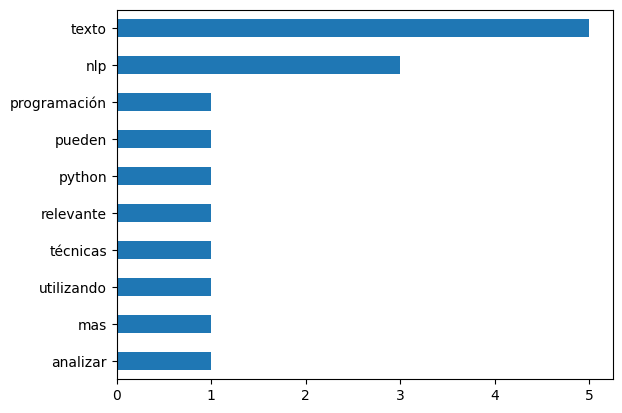

In [14]:
# El top 10 de los terminos mas frecuentes en el corpus
bag_words.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot.barh()

## Term Frequency-Inverse Document Frequency

In [15]:
# Crear la Bolsa de Palabras con TF-IDF (TfidfVectorizer)
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('spanish'))
tfidf_vector = tfidf_vectorizer.fit_transform(df['Texto_Limpio'])
print("Matriz de TF-IDF:")
print(tfidf_vector.toarray())

Matriz de TF-IDF:
[[0.         0.         0.55363834 0.         0.         0.
  0.55363834 0.55363834 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.28364372
  0.         0.         0.        ]
 [0.         0.55363834 0.         0.         0.         0.55363834
  0.         0.         0.         0.         0.         0.55363834
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.28364372
  0.         0.         0.        ]
 [0.41732741 0.         0.         0.         0.41732741 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.28892095 0.
  0.         0.         0.41732741 0.         0.         0.21380799
  0.41732741 0.41732741 0.        ]
 [0.         0.         0.         0.37107147 0.         0.
  0.         0.         0.37107147 0.         0.371071

In [16]:
# Convertir el arreglo en un dataframe
tifd = pd.DataFrame(tfidf_vector.toarray())
tifd.columns = list(tfidf_vectorizer.get_feature_names_out())
tifd

,analizar,análisis,caracteres,corpus,datos,desafiante,ejemplo,especiales,extraer,importante,...,paso,popular,programación,pueden,python,relevante,texto,técnicas,utilizando,útil
0,0.000000,0.000000,0.553638,0.000000,0.000000,0.000000,0.553638,0.553638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.283644,0.000000,0.000000,0.000000
1,0.000000,0.553638,0.000000,0.000000,0.000000,0.553638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.283644,0.000000,0.000000,0.000000
2,0.417327,0.000000,0.000000,0.000000,0.417327,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.417327,0.000000,0.000000,0.213808,0.417327,0.417327,0.000000
3,0.000000,0.000000,0.000000,0.371071,0.000000,0.000000,0.000000,0.000000,0.371071,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.371071,0.190110,0.000000,0.000000,0.371071
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.516965,...,0.516965,0.000000,0.000000,0.000000,0.000000,0.000000,0.264855,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.472493,0.472493,0.000000,0.472493,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
# Top 10 de los terminos mas relevantes en el corpus
tifd.sum().sort_values(ascending=False).head(10)

texto          1.236060
nlp            0.973935
interesante    0.553638
caracteres     0.553638
análisis       0.553638
desafiante     0.553638
ejemplo        0.553638
especiales     0.553638
limpieza       0.516965
importante     0.516965
dtype: float64

In [18]:
tifd['Categoria'] = df['Categoria']
tifd

,analizar,análisis,caracteres,corpus,datos,desafiante,ejemplo,especiales,extraer,importante,...,popular,programación,pueden,python,relevante,texto,técnicas,utilizando,útil,Categoria
0,0.000000,0.000000,0.553638,0.000000,0.000000,0.000000,0.553638,0.553638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.283644,0.000000,0.000000,0.000000,A
1,0.000000,0.553638,0.000000,0.000000,0.000000,0.553638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.283644,0.000000,0.000000,0.000000,B
2,0.417327,0.000000,0.000000,0.000000,0.417327,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.417327,0.000000,0.000000,0.213808,0.417327,0.417327,0.000000,A
3,0.000000,0.000000,0.000000,0.371071,0.000000,0.000000,0.000000,0.000000,0.371071,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.371071,0.190110,0.000000,0.000000,0.371071,B
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.516965,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.264855,0.000000,0.000000,0.000000,A
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.472493,0.472493,0.000000,0.472493,0.000000,0.000000,0.000000,0.000000,0.000000,B


In [19]:
# Análisis de correlación de A y B
tifd_by_cat = tifd.groupby('Categoria').sum().T.reset_index(names='Termino').set_index('Termino')
tifd_by_cat


Categoria,A,B
Termino,,
analizar,0.417327,0.000000
análisis,0.000000,0.553638
caracteres,0.553638,0.000000
corpus,0.000000,0.371071
datos,0.417327,0.000000
desafiante,0.000000,0.553638
ejemplo,0.553638,0.000000
especiales,0.553638,0.000000
extraer,0.000000,0.371071


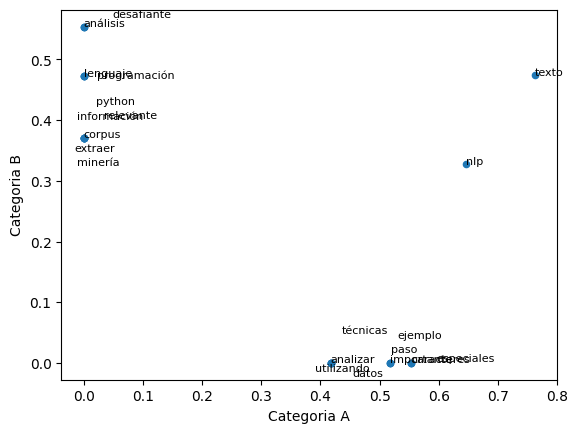

In [20]:
# Gráfico de dispersión del tifd de las categorias A y B
ax = tifd_by_cat.plot.scatter(x='A',y='B')
ax.set_xlabel("Categoria A")
ax.set_ylabel("Categoria B")
positions = {}
for i, txt in enumerate(tifd_by_cat.index):
    x, y = tifd_by_cat['A'][i], tifd_by_cat['B'][i]
    
    # Verificar si la posición ya está ocupada
    while (x, y) in positions:
        # Aplicar un desplazamiento aleatorio
        x += random.uniform(-0.05, 0.05)
        y += random.uniform(-0.05, 0.05)
    
    # Registrar la posición en el diccionario
    positions[(x, y)] = True
    
    # Agregar el texto
    ax.annotate(txt, (x, y), fontsize=8)

## Wordcloud

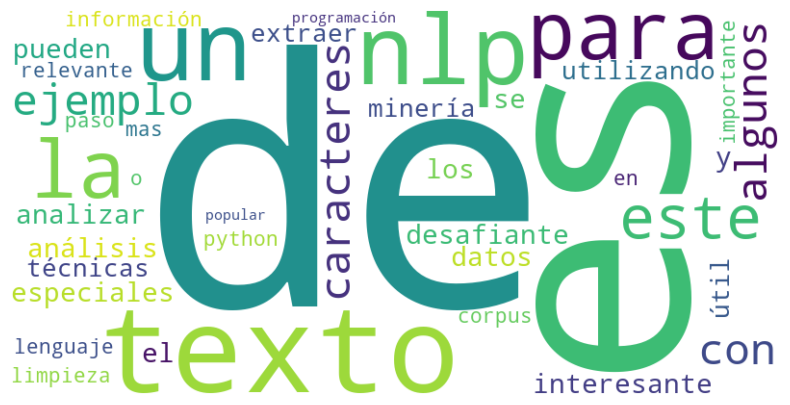

In [21]:
# Unificar el corpus
corpus = ' '.join(df['Texto_Limpio'])

# Configuración del Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus)

# Mostrar el Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

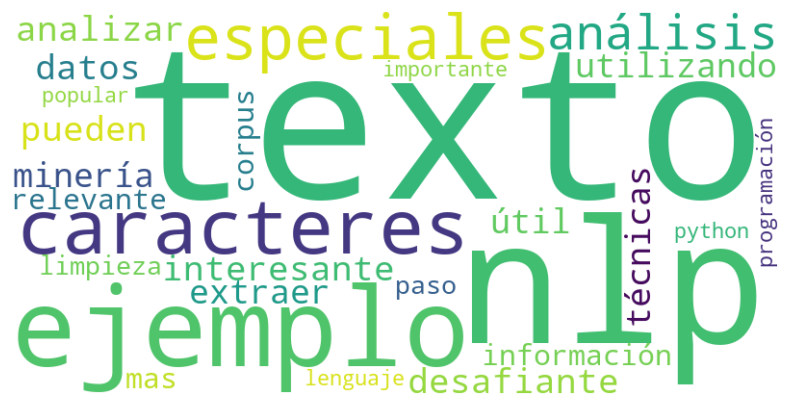

In [22]:
# WordCloud sin stopwords
corpus = ' '.join(df['Texto_Limpio'])

# Tokeniza el texto en palabras
palabras = corpus.split()

# Elimina las "stop words" en español
palabras_sin_stopwords = [palabra for palabra in palabras if palabra.lower() not in stopwords.words('spanish')]

# Convierte la lista de palabras nuevamente en un texto
texto_sin_stopwords = ' '.join(palabras_sin_stopwords)


# Configuración del Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_sin_stopwords)

# Mostrar el Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Clustering

In [23]:
# Modelo de Cluster
cluster_model = KMeans(n_clusters=2)

# Conjunto de entrenamiento
X_train = tifd.drop(columns='Categoria').copy()
y_train = tifd['Categoria']
cluster_model.fit(X_train)

/Users/hfelizzola/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [24]:
# Predicción del cluster
cluster_model.predict(X_train)

array([0, 0, 1, 0, 1, 1], dtype=int32)

In [25]:
# Comparación de las categorias y los cluster
tifd['Cluster'] = cluster_model.predict(X_train)
tifd[['Categoria','Cluster']]

,Categoria,Cluster
0,A,0
1,B,0
2,A,1
3,B,0
4,A,1
5,B,1


In [26]:
tifd.groupby(['Categoria','Cluster']).size()

Categoria  Cluster
A          0          1
           1          2
B          0          2
           1          1
dtype: int64

## Clasificación de Textos

In [27]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
# Predicción de la categoria
dt.predict(X_train)

array(['A', 'B', 'A', 'B', 'A', 'B'], dtype=object)

In [29]:
# Comparación de las categorias y los cluster
tifd['Prediccion de Categoria'] = dt.predict(X_train)
tifd[['Categoria','Prediccion de Categoria']]

,Categoria,Prediccion de Categoria
0,A,A
1,B,B
2,A,A
3,B,B
4,A,A
5,B,B


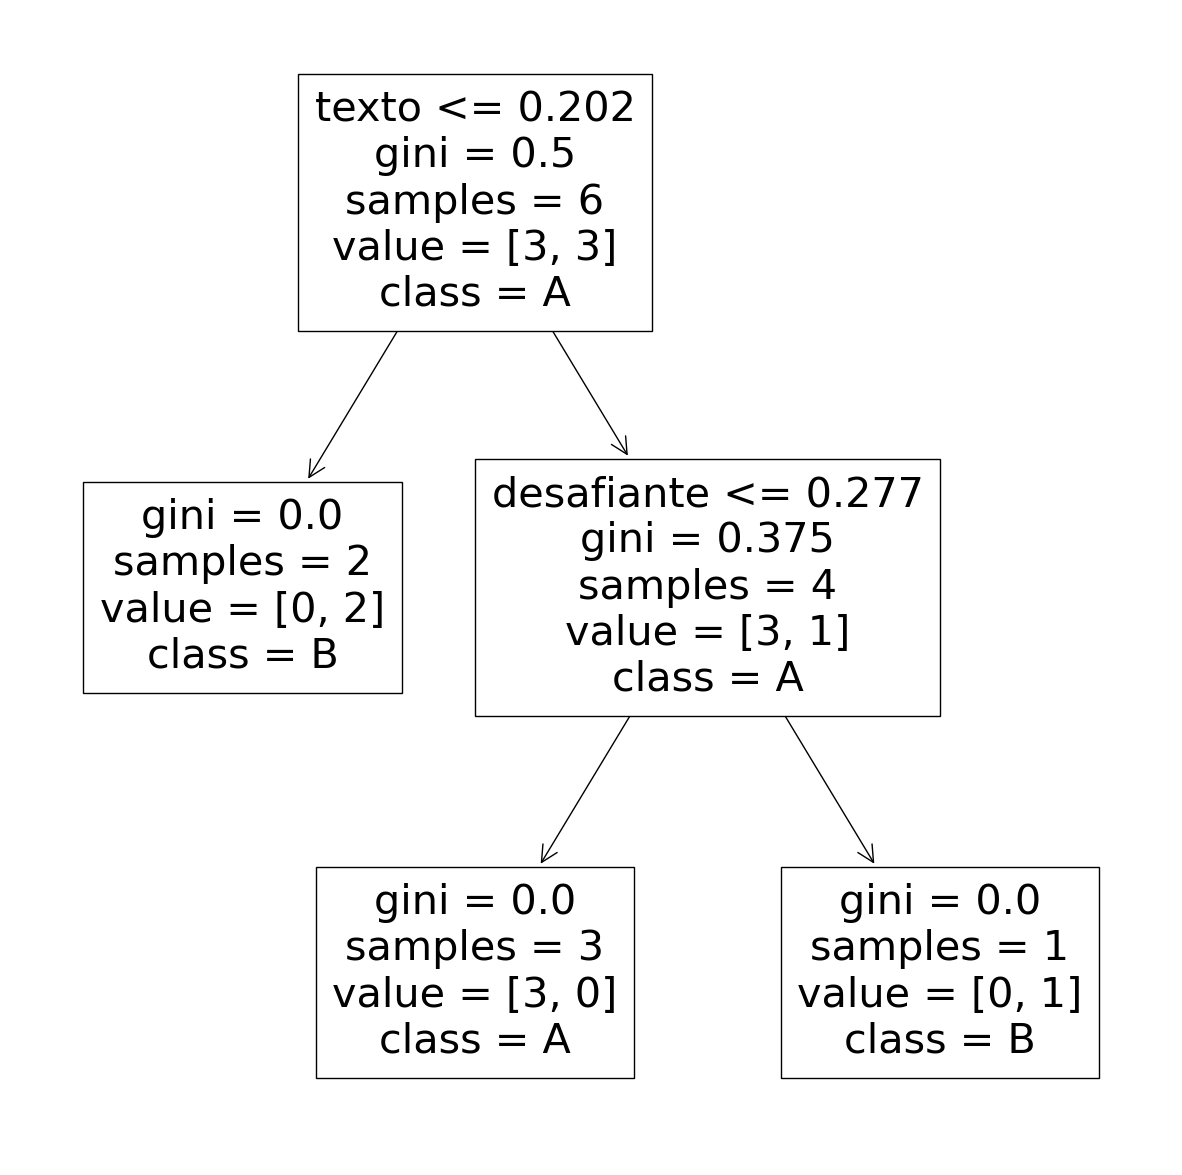

In [30]:
# Orden las clases en el arbol
dt.classes_.astype('str')
# El siguiente codigo se utilizar para visualizar el árbol
plt.figure(figsize=(15,15))
plot_tree(dt, feature_names=X_train.columns, class_names=dt.classes_.astype('str'))
plt.show()